In [1]:
!pip install replicate

import replicate
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


Import json file from wikihow

In [2]:
import json

from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))

with open(file_name, 'r') as file:
    data = json.load(file)

main_goal = data['title']

wiki_steps = []

for part in data['parts']:
    for step in part['steps']:
        wiki_steps.append(step['headline'])

Saving 1503_soothe-a-teething-baby.json to 1503_soothe-a-teething-baby.json


In [3]:
wiki_steps

["Rub your baby's gums with a clean finger.",
 "Keep your baby's mouth cool.",
 'Invest in a teething device.',
 'Give your baby hard foods.',
 'Dry any drool you see.',
 'Try over-the-counter drugs.',
 'Use teething gels.',
 'Be cautious when trying homeopathic cures.',
 'Know when to see a doctor.',
 'Take your baby to the dentist.',
 "Care for your baby's new teeth.",
 'Prevent tooth decay by feeding your baby a healthy diet.']

In [20]:
os.environ['REPLICATE_API_TOKEN'] = 'r8_e4mEdTT4wmpHuZB2RHxxw8Gr6xAlEWS33mK6e'
api = replicate.Client(api_token=os.environ["REPLICATE_API_TOKEN"])
text = ""
input = {
    "top_p": 1,
    "prompt": main_goal,
    "temperature": 0.75,
    "system_prompt": "Make a numbered list of the steps to achieve the goal.",
    "max_new_tokens": 800,
    "repetition_penalty": 1
}

for event in api.stream(
    "meta/llama-2-7b-chat",
    input=input
): text += str(event)

In [21]:
print(text)

 Sure, here are the steps to achieve the goal of soothing a teething baby:

1. Provide a teething ring or toy: Offer the baby a teething ring or toy to chew on. This can help distract the baby from the discomfort of teething and provide relief.
2. Use cold compresses: Apply a cold compress to the baby's gums to help reduce swelling and provide relief.
3. Massage the baby's gums: Gently massage the baby's gums with your finger in a circular motion. This can help stimulate blood flow and reduce pain.
4. Try topical anesthetics: Apply a topical anesthetic, such as Orajel or Anbesol, to the baby's gums to help numb the area and provide relief.
5. Offer pain relief medication: If the baby is older than 6 months, you can try offering pain relief medication, such as acetaminophen or ibuprofen, in consultation with your pediatrician.
6. Use homeopathic remedies: Some homeopathic remedies, such as Chamomilla or Belladonna, can help soothe teething symptoms in babies.
7. Try alternative therapie

Put Llama 2 output into a list

In [23]:
import re

llama_steps = []

lines = text.splitlines()

pattern = re.compile(r'^\d+\.\s+(.*)')

for line in lines:
    match = pattern.match(line)
    if match:
        step_text = match.group(1)
        llama_steps.append(step_text)

In [24]:
llama_steps

['Provide a teething ring or toy: Offer the baby a teething ring or toy to chew on. This can help distract the baby from the discomfort of teething and provide relief.',
 "Use cold compresses: Apply a cold compress to the baby's gums to help reduce swelling and provide relief.",
 "Massage the baby's gums: Gently massage the baby's gums with your finger in a circular motion. This can help stimulate blood flow and reduce pain.",
 "Try topical anesthetics: Apply a topical anesthetic, such as Orajel or Anbesol, to the baby's gums to help numb the area and provide relief.",
 'Offer pain relief medication: If the baby is older than 6 months, you can try offering pain relief medication, such as acetaminophen or ibuprofen, in consultation with your pediatrician.',
 'Use homeopathic remedies: Some homeopathic remedies, such as Chamomilla or Belladonna, can help soothe teething symptoms in babies.',
 'Try alternative therapies: Some alternative therapies, such as music therapy or aromatherapy, m

Dynamic Time Warping? + BLEU Scores

In [25]:
!pip install nltk fastdtw dtaidistance

import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
from dtaidistance import dtw
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import pandas as pd
from nltk.translate.bleu_score import SmoothingFunction
import itertools

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Tokenize sentences
wiki_tokenized = [nltk.word_tokenize(sentence) for sentence in wiki_steps]
llama_tokenized = [nltk.word_tokenize(sentence) for sentence in llama_steps]

smoothing_function = SmoothingFunction().method1

# BLEU score matrix
bleu_matrix = np.zeros((len(wiki_steps), len(llama_steps)))

for i, ref in enumerate(wiki_tokenized):
    for j, hyp in enumerate(llama_tokenized):
        bleu_matrix[i, j] = sentence_bleu([ref], hyp, smoothing_function=smoothing_function)

# Display the BLEU similarity matrix as a DataFrame for better readability
bleu_df = pd.DataFrame(bleu_matrix, index=[f"wiki_{i}" for i in range(len(wiki_steps))],
                       columns=[f"llama_{j}" for j in range(len(llama_steps))])

print("BLEU Similarity Matrix:")
print(bleu_df)

BLEU Similarity Matrix:
          llama_0   llama_1   llama_2   llama_3   llama_4   llama_5   llama_6  \
wiki_0   0.007205  0.051367  0.092427  0.036394  0.007743  0.008687  0.008282   
wiki_1   0.006511  0.021378  0.015704  0.015146  0.007205  0.008687  0.008282   
wiki_2   0.012813  0.010863  0.014614  0.007696  0.006511  0.011433  0.010900   
wiki_3   0.006511  0.010863  0.008218  0.007696  0.007205  0.008687  0.008282   
wiki_4   0.005475  0.009134  0.006244  0.006472  0.006511  0.008687  0.008282   
wiki_5   0.005475  0.009134  0.006244  0.007696  0.005475  0.008687  0.009849   
wiki_6   0.006511  0.010863  0.006244  0.006472  0.005475  0.011433  0.009849   
wiki_7   0.005475  0.009134  0.006244  0.006472  0.005475  0.010331  0.008282   
wiki_8   0.007205  0.012022  0.007426  0.008517  0.005475  0.008687  0.008282   
wiki_9   0.007743  0.022972  0.008831  0.016276  0.007743  0.008687  0.008282   
wiki_10  0.006511  0.021378  0.015704  0.015146  0.007205  0.008687  0.008282   
wiki

In [27]:
# Calculate the maximum BLEU score for each llama entry
max_bleu_scores = np.max(bleu_matrix, axis=0)

# Calculate the average of the maximum BLEU scores
average_max_bleu = np.mean(max_bleu_scores)


max_indices = np.argmax(bleu_matrix, axis=0)

# Print the corresponding sentence matchups
print("Maximum BLEU score sentence matchups:")
for j, max_index in enumerate(max_indices):
    print(f"LLama: {llama_steps[j]} -> Wiki: {wiki_steps[max_index]}")

print("\nMaximum BLEU scores for each 'llama' entry:")
print(max_bleu_scores)
print("\nAverage of the maximum BLEU scores:", average_max_bleu)

Maximum BLEU score sentence matchups:
LLama: Provide a teething ring or toy: Offer the baby a teething ring or toy to chew on. This can help distract the baby from the discomfort of teething and provide relief. -> Wiki: Invest in a teething device.
LLama: Use cold compresses: Apply a cold compress to the baby's gums to help reduce swelling and provide relief. -> Wiki: Rub your baby's gums with a clean finger.
LLama: Massage the baby's gums: Gently massage the baby's gums with your finger in a circular motion. This can help stimulate blood flow and reduce pain. -> Wiki: Rub your baby's gums with a clean finger.
LLama: Try topical anesthetics: Apply a topical anesthetic, such as Orajel or Anbesol, to the baby's gums to help numb the area and provide relief. -> Wiki: Rub your baby's gums with a clean finger.
LLama: Offer pain relief medication: If the baby is older than 6 months, you can try offering pain relief medication, such as acetaminophen or ibuprofen, in consultation with your ped

Plot the maximum Bleu Scores

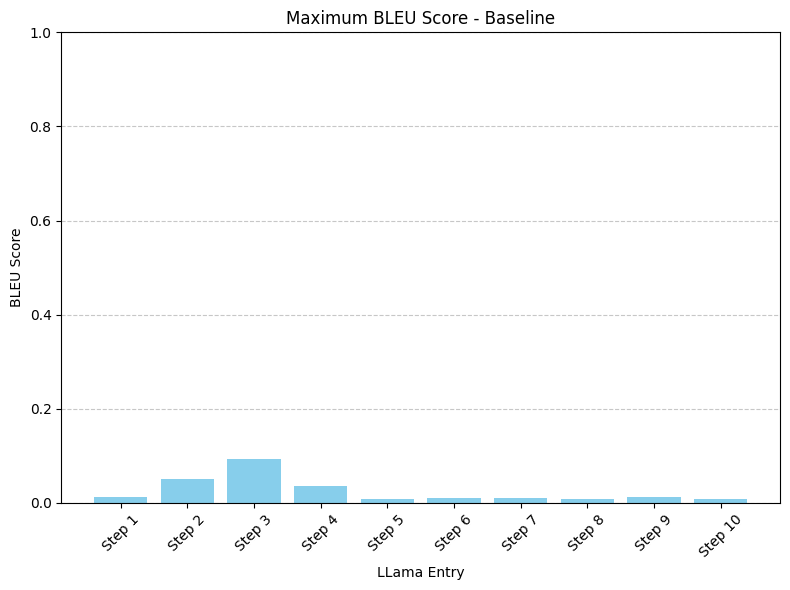

In [28]:
import matplotlib.pyplot as plt

# Plot the maximum BLEU scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(llama_steps)), max_bleu_scores, color='skyblue')
plt.xlabel('LLama Entry')
plt.ylabel('BLEU Score')
plt.title('Maximum BLEU Score - Baseline')
plt.xticks(range(len(llama_steps)), ['Step ' + str(i+1) for i in range(len(llama_steps))], rotation=45)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()